In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
from HkVp_multilayer.hkvp_stacking import HkVp_stacking



maindir = "seismic_data_RFAC"
stationname = "TASTE_T03"

datadir = f"{maindir}/{stationname}"
delta = 0.01  # Time step in seconds
priorparam = {
    "Nlayer":3,
    "Vps":[3.0, 4.5, 6.36],
    "Hs":[100, 3, 6, 4, 8, 30, 40],
    "Ks":[100, 2.0, 3.0, 1.5, 2.5, 1.5, 1.9]
}


phaseparam = [
    {
       "Pis":       [1, 0,  1, -1],
       "PpPis":     [1, 0,  1,  1], 
        "PpSis":     [-1, 0, 2,  0], 
       "PsSis":     [-1, 0, 3,  -1], 
       "PiP":       [-1, 2, 0,  2], 
       "SiS":       [-1, 4, 2,  0]   
    },
    {
       "Pbs":        [1, 0,  1, -1, 1,  -1], 
       "PpPbs":      [1, 0,  1,  1, 1,   1], 
       "PpSbs":      [-1, 0, 2,  0, 2,   0], 
       "PsSbs":      [-1, 0, 3, -1, 3,  -1], 
       "PbP":        [-1, 2, 0,  2, 0,   2], 
       "SbS":        [-1, 4, 2,  0, 2,   0]  
    },
    {
        "Pms":         [1, 1,  1, -1,  1, -1,  1, -1,],  
        # "PpPms-PbP":   [1, 1,  1, -1,  1, -1,  1,  1,],  
        "PpPms":       [1, 1,  1,  1,  1,  1,  1,  1,], 
        "PmP":         [-1,3,  0,  2,  0,  2,  0,  2,],  
        # "PmP+PbP":     [1, 3,  0,  4,  0,  2,  0,  2,], 
        "bPmSb":       [1, 5,  0,  0,  0,  0,  1,  1,],  
        # "PmS":         [1, 5,  1,  1,  1,  1,  1,  1,],  
    }
]
 
datanpz = np.load(f"{datadir}/data_stack52.npz") ##7 5, 0.08
data_stack = datanpz['data_stack']
ray_params = datanpz['ray_params']
traces_suppress = [1,1,3,3,5,5]  ## the trace number where the phases trace should be suppressed; The traces should have the same data source with their index trace
alphas = [5,2,5,2,5,2]    ## 
HkVp_instance = HkVp_stacking(delta,
                            data_stack,
                            alphas,
                            traces_suppress,
                            ray_params,
                            priorparam,
                            phaseparam,
                            2
                            )
HkVp_instance.do_Hk_stacking()
# amp_vpc=HkVp_instance.do_Vpc_searching(6.,7.,10)
HkVp_instance.do_hk_bootstrap(1000,16)
HkVp_instance.save_result_to_npz(savedir=datadir,savename='Hk_result_52_pws2_3layer')
del HkVp_instance


Process 106088 working (Job Number : 62)
Process 106089 working (Job Number : 62)
Process 106090 working (Job Number : 62)
Process 106091 working (Job Number : 62)
Process 106092 working (Job Number : 62)
Process 106093 working (Job Number : 62)
Process 106094 working (Job Number : 62)
Process 106095 working (Job Number : 62)
Process 106096 working (Job Number : 62)
Process 106097 working (Job Number : 62)
Process 106098 working (Job Number : 62)
Process 106099 working (Job Number : 62)
Process 106100 working (Job Number : 62)
Process 106101 working (Job Number : 62)
Process 106102 working (Job Number : 62)
Process 106103 working (Job Number : 62)
Process 106088 finished
Process 106089 finished
Process 106093 finished
Process 106091 finished
Process 106090 finishedProcess 106092 finished

Process 106095 finished
Process 106102 finished
Process 106094 finished
Process 106098 finished
Process 106096 finished
Process 106097 finished
Process 106103 finished
Process 106100 finished
Process 

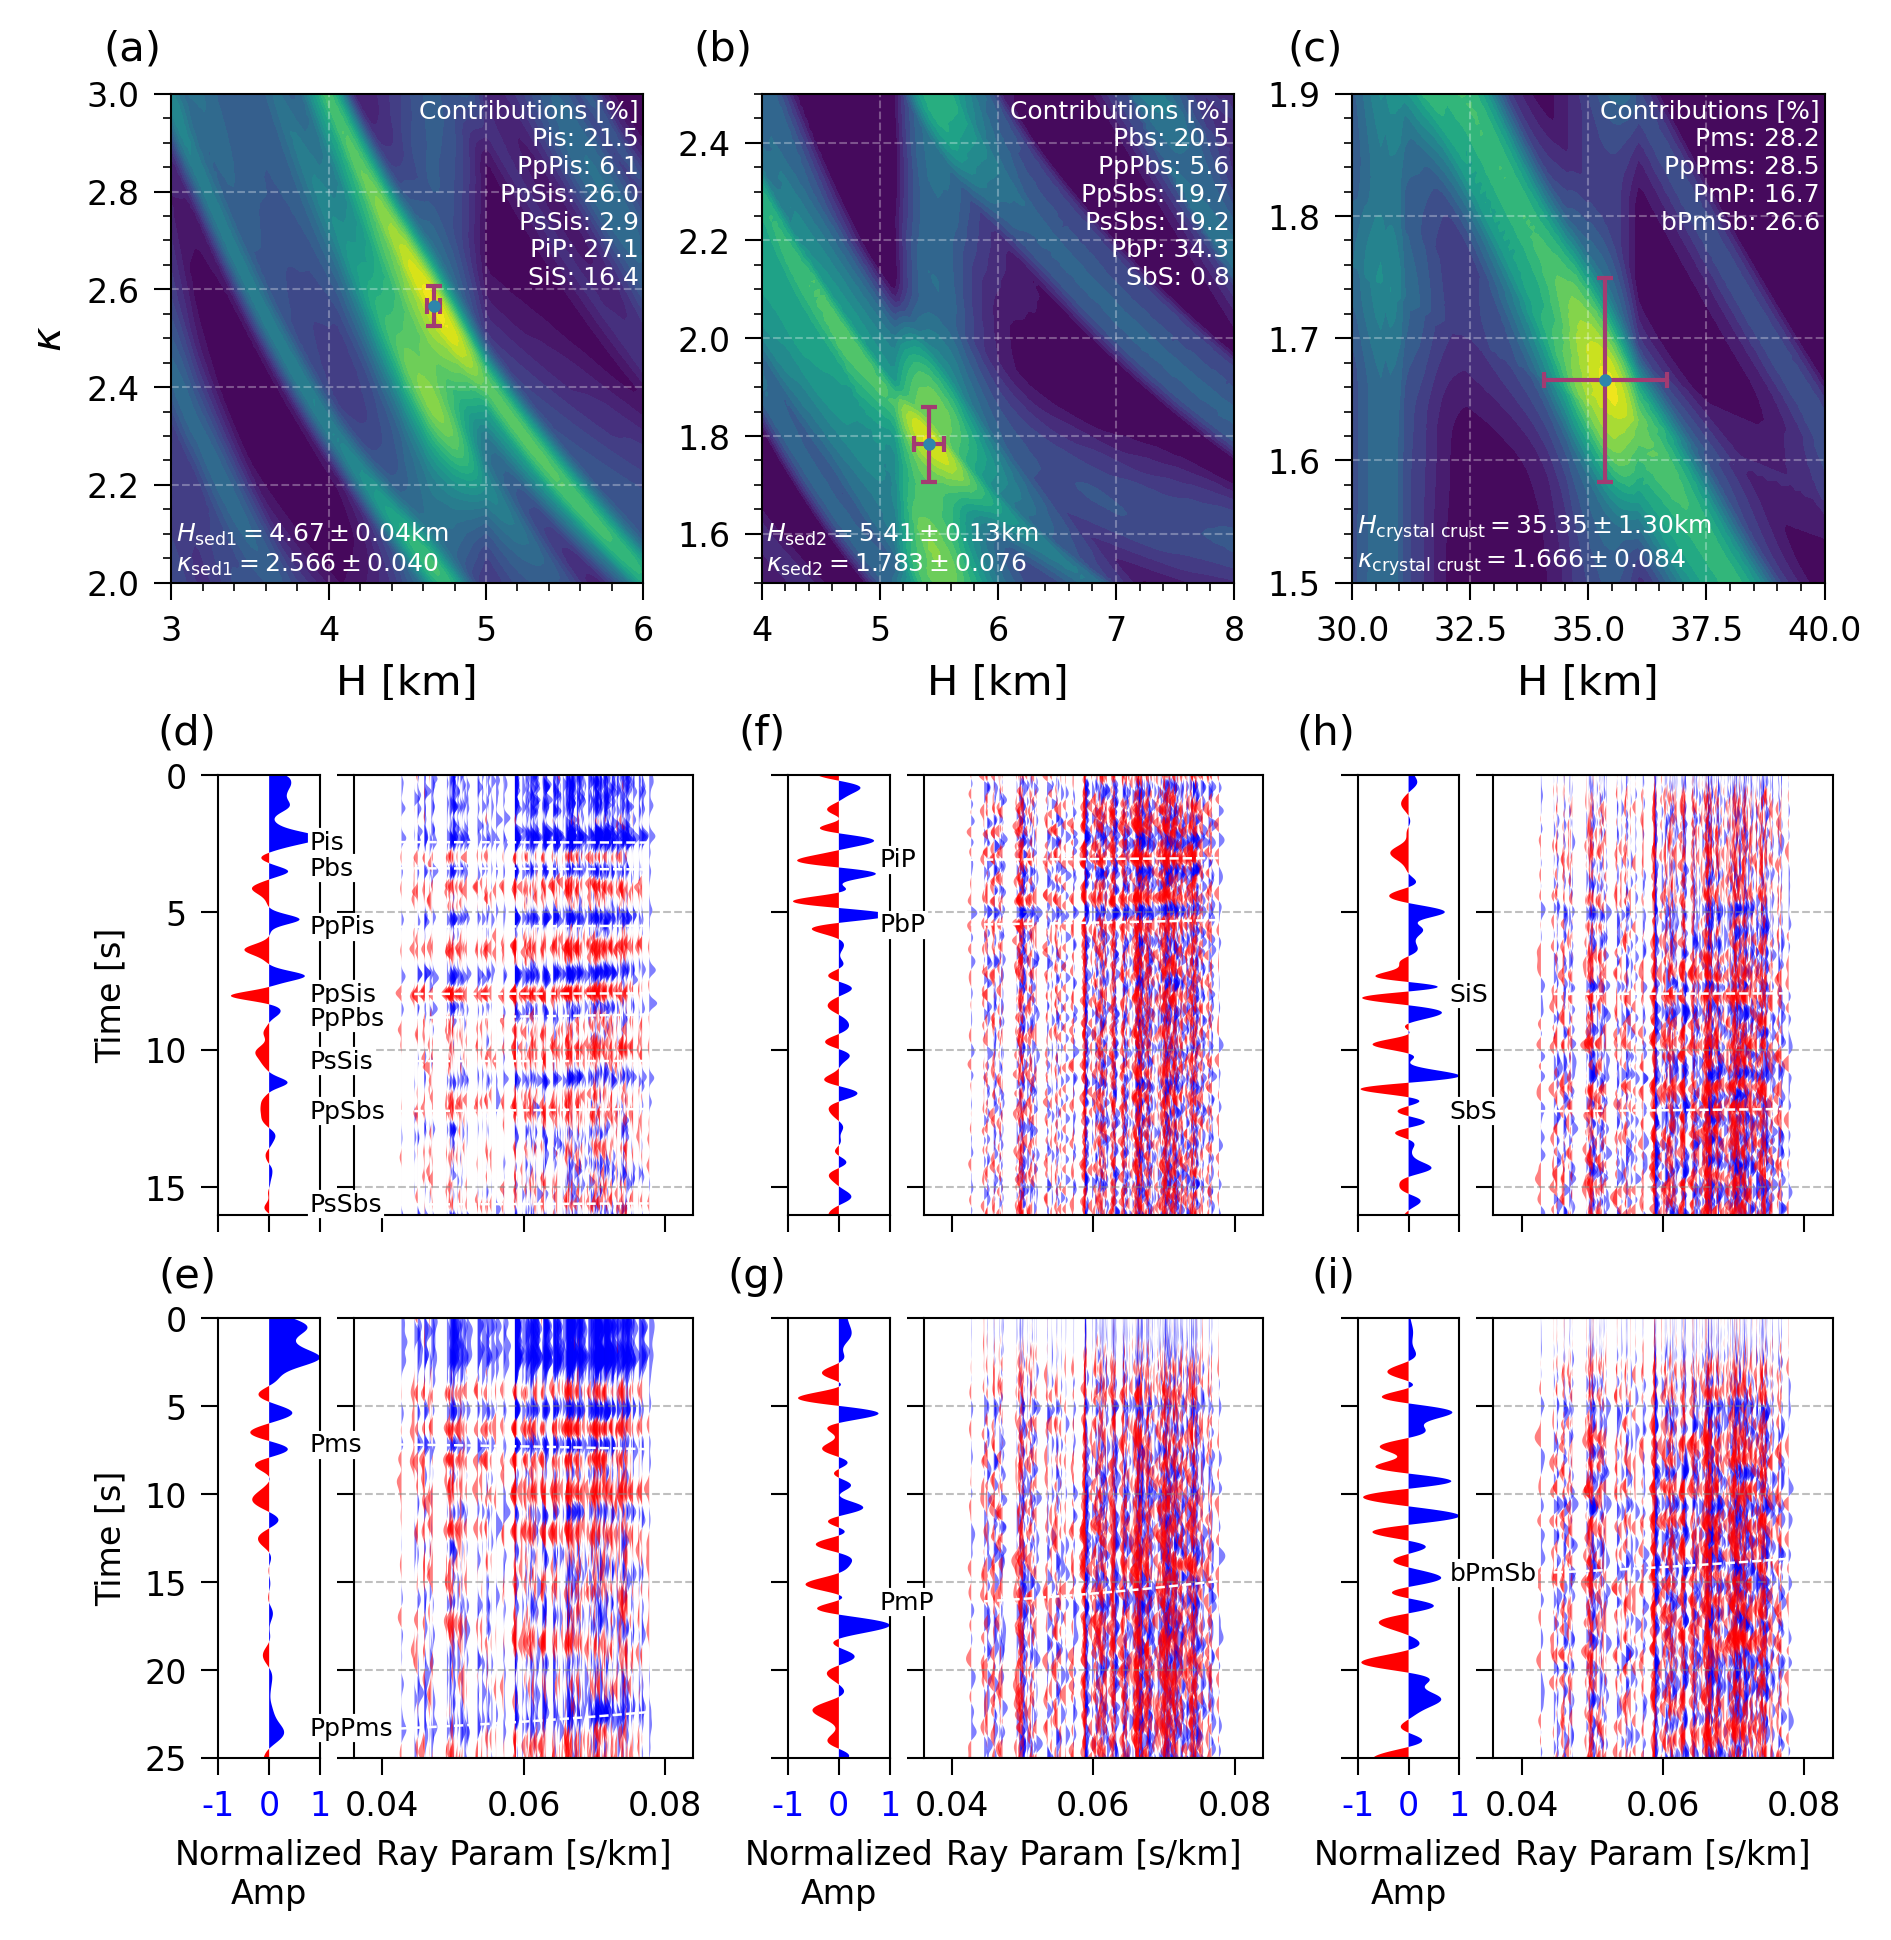

In [1]:
from HkVp_multilayer.plotting import Plot_HkVp
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams['figure.dpi'] = 300


maindir = "seismic_data_RFAC"
stationname = "TASTE_T03"
datadir = f"{maindir}/{stationname}"
save_filename = f"Hk_result_52_pws2_3layer_Hk_result.npz"
plot_instance = Plot_HkVp(savefile=f"{datadir}/{save_filename}")
plot_instance.data_Hk_Phasefitting(savefile=f"{datadir}/Hk_phasefitting_3layer.pdf",dpi=900,plotlengths = [16,25,16,25,16,25])
#plot_instance.plot_HkVp(savefile=f"{resultdir}/HkVp.pdf",dpi=900)